<table style="width:100%; background-color:#FFFFFF" align="left">
 <tr>
   <td style="text-align:left; background-color:#FFFFFF">
       <p>Prof. Dr. Stefan Decker <br>
        M. Slupczynski <br>
        L. Neumann <br>
        M. Kißgen </p>
        <p><strong>2024-04-22</strong></p>
     </td>
   <td style="text-align:right; background-color:#FFFFFF">
     <div>
       <img src="https://git.rwth-aachen.de/i5/teaching/dbis-raw/-/raw/main/dbis-logo.png" width="500"/>
     </div>
    </td>
 </tr>
</table>
<div class="clearfix"></div>
<center>
    <h1>Datenbanken und Informationssysteme (SoSe 2024) </h1>
    <h1>Übung 2 - ER-Diagramme und relationales Modell</h1>
</center>

<center>
    <h4>Abgabe bis 2024-04-29 12:15 Uhr</h4>
    <strong>Zu spät eingereichte Übungen werden nicht berücksichtigt.</strong>
</center>

<div class="hidden-print"><hr />
<h3> Wichtige Hinweise</h3>
<ul>
<li>Bei Nichtbeachtung dieser Hinweise wird die Abgabe mit 0 Punkten bewertet!</li>
<li>Bitte laden Sie Ihre digitalen Lösungen mit diesem Notebook ins Moodle hoch.</li>
<li>Bitte geben Sie Namen, Matrikelnummern auf der schriftlichen Lösung an.</li>
</ul></div>

<strong>Die Lösung zu diesem Übungsblatt wird in den Übungen am 29. April und 3. Mai vorgestellt. <br /> 
Bitte beachten Sie auch die aktuellen Ankündigungen im Moodle-Lernraum zur Vorlesung. </strong> <br />
<em>* bezeichnet Bonusaufgaben.</em>
<hr />

<h3>Dokumentations-Notebook</h3>
Wir empfehlen ihnen das zu dieser Übung zugehörige Dokumentations-Notebook zu lesen. Zusätzlich zur der Handhabung der verschiedenen verwendeten Tools werden dort zentrale Konzepte der Vorlesung noch einmal wiederholt. Sie finden das Notebook im <a href="https://moodle.rwth-aachen.de/course/view.php?id=39633">Moodle Lernraum</a>.

<h3>Abgabegruppe</h3>
Es ist möglich die Abgabe in Gruppen von bis zu fünf Personen zu bearbeiten. <strong>Jeder Gruppenteilnehmer muss für sich ein Notebook hochladen</strong>. Wenn Sie in einer Abgabegruppe arbeiten, dürfen die Notebooks der Gruppenteilnehmer den gleichen Inhalt aufweisen. Wenn Sie in einer Gruppe arbeiten, tragen Sie hier bitte alle Gruppenteilnehmer inklusive sich selbst ein. <strong>Eine inkonsistente Angabe von Gruppenmitgliedern bei den Teilnehmern führt im Zweifel zu 0 Punkten für alle Gruppenteilnehmer!</strong> Es ist möglich zwischen den Abgaben die Gruppen zu wechseln.

<h4>Andere Gruppenteilnehmer (Wenn Einzelabgabe, bitte leer lassen)</h4>
<ul>
    <li>Florian Assmuth, 449348</li>
    <li>Elisona Agalliu, 430455</li>
    <li>Beren Kapanci, 424273</li>
    <li>Erik Fedrau, 433793</li>
    <li>Name, Matr. Nr.</li>
</ul>

<div class="alert alert-info hidden-print">Die folgende Codezelle sollte zu Beginn der Bearbeitung der Übung ausgeführt werden. <br /> Am Ende sollte <b>"OK, es kann los gehen!"</b> stehen. Dies kann ein paar Minuten dauern.</div>

In [1]:
%pip install "dbis-er-diagram~=1.1" "dbis-exc-manager~=1.0" "dbis-relational-model~=1.0"
try: 
    # import libraries
    from erdiagram import ER
    from erdiagram import *
    from excmanager.Task import Exercise, Task, SubTask
    from IPython.display import display, HTML
    from dbis_relational_model import RM, Relation, Intersection, ProjectedRelation, Subset
    # initialize task structure
    exc = Exercise( 2 )
    task1 = Task( exc, "2.1" )
    task2 = Task( exc, "2.2" )
except Exception as e:
    display(HTML(f"<div class='alert alert-danger'><h2>Etwas ist beim import schief gelaufen:</h1>{e}</div>"))
else:
    display(HTML("<div class='alert alert-success'><h1>OK, es kann los gehen!</h1></div>"))
    

Note: you may need to restart the kernel to use updated packages.


<hr />

<div class="pull-left">

<h2> Aufgabe 2.1 (ER-Diagramm Spezialisierungen) </h2>

</div>

<div class="pull-right">

<h3> (10 Punkte) </h3>

</div>

Entwerfen Sie zu der folgenden textuellen Beschreibung ein Entity-Relationship-Modell.   
Verwenden Sie zur Beschreibung der Kardinalitäten die `(min, max)`-Notation.

* Ein `Angestellter` ist `Pilot`, `Flugbegleiter` oder `Bodenpersonal`. Einzelne Angestellte können nicht in mehrere dieser Kategorien fallen. Andere Kategorien sind jedoch möglich.
* `Flugzeug`e werden von Piloten geflogen und von Flugbegleiter betreut. Des Weiteren werden Flugzeuge durch das Bodenpersonal repariert. 
* Ein Pilot kann mindestens 1, jedoch auch beliebig mehrere andere Flugzeuge fliegen. Je nach Flugzeugart wird ein Flugzeug von mindestens 2 bis maximal 4 Piloten geflogen.
* Ein Flugbegleiter kann mindestens 1, jedoch auch beliebig mehrere andere Flugzeuge betreuen. Je nach Flugzeugkapazität werden keine oder 4 Flugbegleiter benötigt.
* Pro Flugzeug werden mindestens 2 bis maximal 4 Mitglieder des Bodenpersonals für Wartungsarbeiten benötigt. Ein Bodenpersonal kann beliebig viele Flugzeuge warten.
* `Fluggesellschaft`en werden in `Charterfluggesellschaft`en, `Billigfluggesellschaft`en  oder `Frachtfluggesellschaft`en unterschieden. Es kann weitere Fluggesellschaften geben. Jedoch können einzelne Fluggesellschaften nicht in mehrere dieser Kategorien fallen.
* Fluggesellschaften besitzen mindestens 1 oder beliebig mehrere andere Flugzeuge. Ein Flugzeug hingegen wird von genau einer Fluggesellschaft besessen. 
* Fluggesellschaften betreiben mindestens 1 bis maximal 100 `Fluglinie`n. Eine Fluglinie wird hingegen von beliebig vielen Fluggesellschaften betrieben.
* Fluglinien starten in genau einen `Flughafen` und enden auch in genau einen Flughafen. Hingegen starten und enden beliebig viele Fluglinien in Flughäfen.


**Hinweis**: 
* Es gibt keine Schlüssel oder Attribute in diesem Diagramm. 
* Benennen Sie die im Text genannten Entity-Typen und Beziehungen genau wie angegeben. Benutzen Sie für die Namen der Entity-Typen stets den Singular.
* Die Klammern der `(min, max)`-Notation sind notwendig.

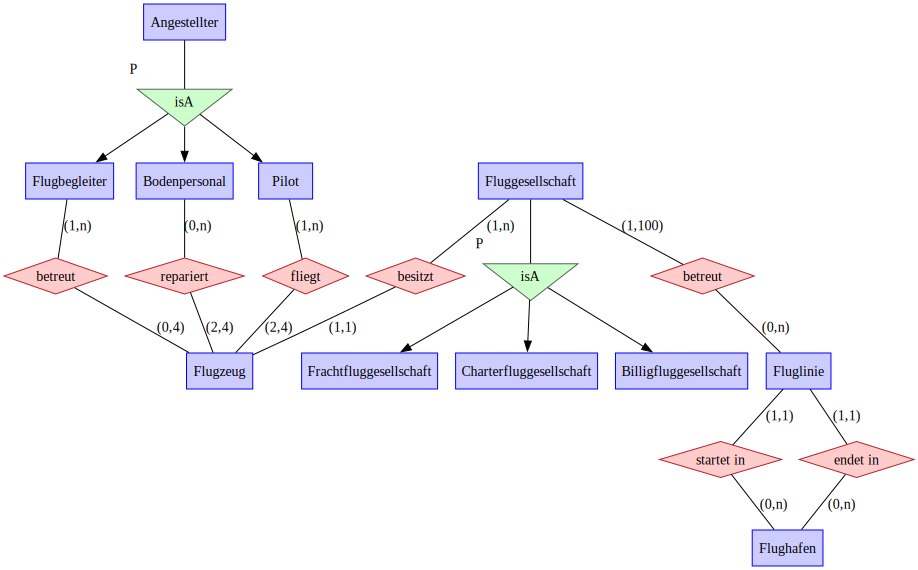

In [2]:

g = ER()

g.add_entity('Angestellter')
g.add_entity('Fluggesellschaft')

# IHR CODE HIER
g.add_is_a('Angestellter', ['Pilot','Flugbegleiter','Bodenpersonal'], is_total = False, is_disjunct = True)
g.add_relation({"Pilot":{"cardinality" :"(1,n)"}}, "fliegt" , {"Flugzeug":{"cardinality" :"(2,4)"}})
g.add_relation({"Flugbegleiter":{"cardinality" :"(1,n)"}}, "betreut" , {"Flugzeug":{"cardinality" :"(0,4)"}})
g.add_relation({"Bodenpersonal":{"cardinality" :"(0,n)"}}, "repariert" , {"Flugzeug":{"cardinality" :"(2,4)"}})
g.add_is_a('Fluggesellschaft', ['Charterfluggesellschaft','Billigfluggesellschaft','Frachtfluggesellschaft'], is_total = False, is_disjunct = True)
g.add_relation({"Fluggesellschaft":"(1,n)"},"besitzt", {"Flugzeug":{"cardinality":"(1,1)"}})
g.add_relation({"Fluggesellschaft":"(1,100)"},"betreut", {"Fluglinie":{"cardinality":"(0,n)"}})
g.add_relation({"Fluglinie":{"cardinality" :"(1,1)"}}, "startet in", {"Flughafen":"(0,n)"})
g.add_relation({"Fluglinie":{"cardinality" :"(1,1)"}}, "endet in", {"Flughafen":"(0,n)"})

# Comments on corrections
# n -> (0,n)
# 1 -> (1,1)
# 0 or 4 -> (0,4) (was correct, but still weird)
# we had our values flipped for most of them.


# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 PUNKTE

subtask = SubTask(task1, "a", points=10)

g.display()

assert len(g.get_entities()) == 11, f"Es werden 11 Entitäten erwartet. Ist: {len(g.get_entities())}"
assert len(g.get_attributes()) == 0, f"Es wird kein Attribut erwartet. Ist: {len(g.get_attributes())}"
assert len(g.get_relations()) == 7, f"Es werden sieben Relationen erwartet. Ist: {len(g.get_relations())}"

subtask.setSolution(g.as_solution())
subtask.setData(g)

In [3]:
# Autograder, bitte ignorieren.
### BEGIN HIDDEN TESTS
#subexercise:Aufgabe 1
task = exc.getTaskByLabel('2.1')

# a)
# get student submission
subtask = task.getSubtaskByLabel("a")
subtask.points = 10
submission = subtask.getData()

# BEGIN Musterloesung
solution = ER()
solution.add_entity("Fluggesellschaft")
solution.add_entity("Billigfluggesellschaft")
solution.add_entity("Frachtfluggesellschaft")
solution.add_entity("Charterfluggesellschaft")
solution.add_entity("Flugzeug")
solution.add_entity("Fluglinie")
solution.add_entity("Flughafen")
solution.add_entity("Angestellter")
solution.add_entity("Pilot")
solution.add_entity("Flugbegleiter")
solution.add_entity("Bodenpersonal")

solution.add_is_a("Fluggesellschaft", ["Billigfluggesellschaft", "Frachtfluggesellschaft", "Charterfluggesellschaft"], is_total=False, is_disjunct=True)
solution.add_is_a("Angestellter", ["Pilot", "Flugbegleiter", "Bodenpersonal"], is_total=False, is_disjunct=True)
    
solution.add_relation({"Flugzeug": "(1,1)"}, "besitzen", {"Fluggesellschaft": "(1,n)"})
solution.add_relation({"Fluglinie": "(0,n)"}, "betreiben", {"Fluggesellschaft": "(1,100)"})
solution.add_relation({"Fluglinie": "(1,1)"}, "starten", {"Flughafen": "(0,n)"})
solution.add_relation({"Fluglinie": "(1,1)"}, "enden", {"Flughafen": "(0,n)"})
solution.add_relation({"Pilot": "(1,n)"}, "fliegen", {"Flugzeug": "(2,4)"})
solution.add_relation({"Flugbegleiter": "(1,n)"}, "betreuen", {"Flugzeug":"(0,4)"})
solution.add_relation({"Flugzeug": "(2,4)"}, "reparieren", {"Bodenpersonal": "(0,n)"})
# END Musterloesung

display(HTML("<h3> TESTING 2.1 </h3>") )

score_compare, log = grade_submission(
    solution,
    submission,
    score_missing_attribute_property = 0.5
)
print(log)
maxPoints = subtask.getPoints()
score = min( maxPoints, max( 0, round( maxPoints - score_compare, 2 ) ) )
print("------------------")
print(f"score: {score}/{subtask.getPoints()}")
subtask.setScore(score)
score
### END HIDDEN TESTS



» Suche Entity Fluggesellschaft...
	✅ Die Entity 'Fluggesellschaft' wurde gefunden. (Gefunden wurde 'Fluggesellschaft' mit einer Genauigkeit von 1.00) 
	✅ Die Entity 'Fluggesellschaft' ist nicht mehrfach.
	✅ Die Entity 'Fluggesellschaft' ist nicht schwach.

» Suche Entity Billigfluggesellschaft...
	✅ Die Entity 'Billigfluggesellschaft' wurde gefunden. (Gefunden wurde 'Fluggesellschaft' mit einer Genauigkeit von 0.84) 
	✅ Die Entity 'Billigfluggesellschaft' ist nicht mehrfach.
	✅ Die Entity 'Billigfluggesellschaft' ist nicht schwach.

» Suche Entity Frachtfluggesellschaft...
	✅ Die Entity 'Frachtfluggesellschaft' wurde gefunden. (Gefunden wurde 'Fluggesellschaft' mit einer Genauigkeit von 0.84) 
	✅ Die Entity 'Frachtfluggesellschaft' ist nicht mehrfach.
	✅ Die Entity 'Frachtfluggesellschaft' ist nicht schwach.

» Suche Entity Charterfluggesellschaft...
	✅ Die Entity 'Charterfluggesellschaft' wurde gefunden. (Gefunden wurde 'Fluggesellschaft' mit einer Genauigkeit von 0.82) 
	✅ Die Enti

10

<div class="pull-left">

<h2> Aufgabe 2.2 (Relationales Datenmodell) </h2>

</div>

<div class="pull-right">

<h3> (10 Punkte) </h3>

</div>

Geben Sie eine Umsetzung des folgenden ER-Diagramms in ein relationales Datenbankschema an. Bitte gruppieren Sie Ihre Lösung in Relationen und interrelationale Abhängigkeiten. Wir empfehlen ihnen das zu dieser Aufgabe zugehörige Dokumentations-Notebook zu lesen. Sie finden das *Doku-Relational-Model.ipnyb* Notebook im <a href="https://moodle.rwth-aachen.de/course/view.php?id=39633">Moodle Lernraum</a>.


**Hinweise**: 
* Verwenden Sie in den von Ihnen definierten Relationen die im Diagramm angegebenen Attributnamen.   
* Stammt ein Attribut von einem anderen Entity-Typen, beispielsweise als Sekundärschlüssel, benennen Sie es bitte `Entitytyp_Attribut`, um zu kennzeichnen, von welcher Entität das Attribut stammt. (Besipiel: `Kunde_ID`)
* Für die leere Menge benutzen Sie `None`.  
* Integrieren Sie bei der Übersetzung einer 1:n-Beziehung die Beziehung in die entsprechende Relation.
* Zerlegen Sie zusammengesetzte Attribute bei der Übersetzung.
* Verzichten Sie bei der Übersetzung von disjunkten IsA-Beziehungen auf eine einzige gemeinsame Tabelle für den Supertypen und seine Subtypen und nehmen Sie eine andere zulässige Möglichkeit.
* Wenn ein Attribut durch eine eigene Relation dargestellt wird, benennen Sie die Relation wie das Attribut und legen Sie in ihr ein Attribut mit demselben Namen an. Falls der Name des Attributes Leerzeichen beinhaltet, entfernen sie diese.

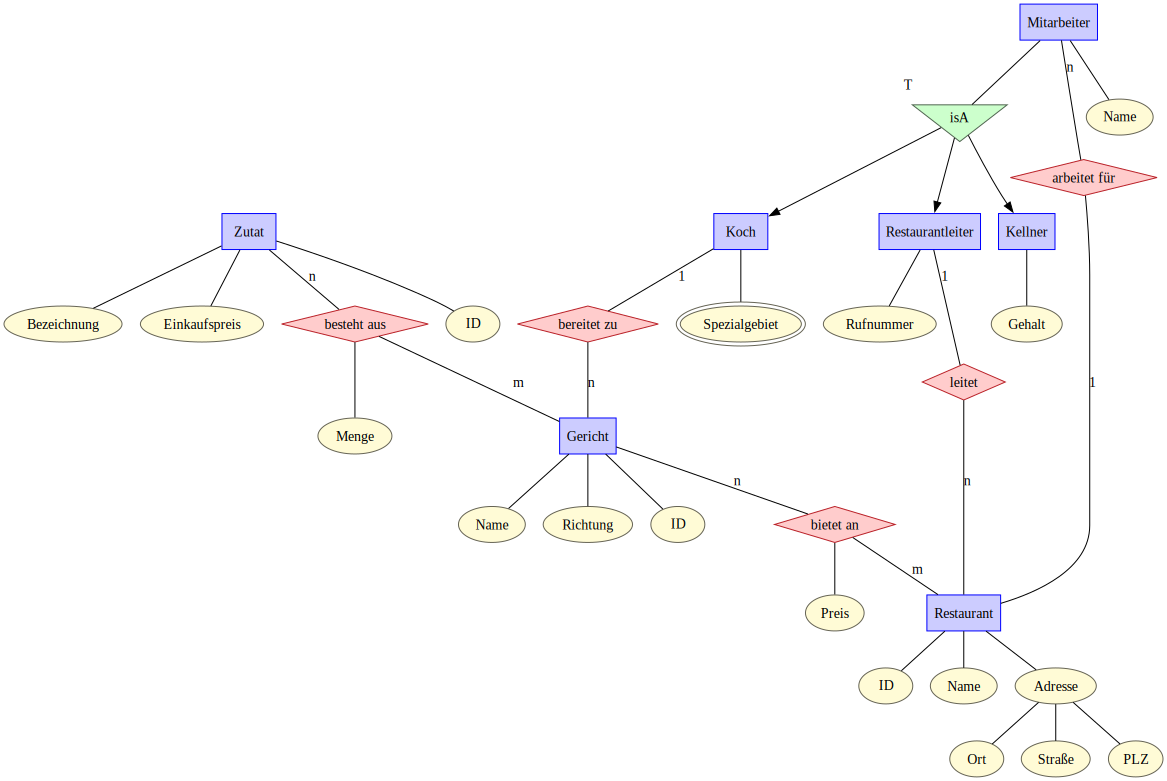

In [4]:
# Diese Code-Zelle ist Teil der Aufgabenstellung und sollte somit nicht verändert werden. 
g = ER()

g.add_entity("Restaurant")
g.add_entity("Gericht")
g.add_entity("Zutat")
g.add_entity("Koch")
g.add_entity("Restaurantleiter")
g.add_entity("Mitarbeiter")
g.add_entity("Kellner")

g.add_relation({"Gericht": "n"}, "bietet an", {"Restaurant": "m"})
g.add_relation({"Zutat": "n"}, "besteht aus", {"Gericht": "m"})
g.add_relation({"Mitarbeiter": "n"}, "arbeitet für", {"Restaurant": "1"})
g.add_relation({"Restaurantleiter": "1"}, "leitet", {"Restaurant": "n"})
g.add_relation({"Koch": "1"}, "bereitet zu", {"Gericht": "n"})

g.add_attribute("Restaurant", "ID", is_pk=True)
g.add_attribute("Restaurant", "Name", is_pk=False)
g.add_attribute("Restaurant", "Adresse" , composed_of=["Ort", "Straße", "PLZ"], is_weak=True, is_pk=False)
g.add_attribute("Zutat", "ID", is_pk=True)
g.add_attribute("Zutat", "Bezeichnung", is_pk=False)
g.add_attribute("Zutat", "Einkaufspreis", is_pk=False)
g.add_attribute("Gericht", "ID", is_pk=True)
g.add_attribute("Gericht", "Name", is_pk=False)
g.add_attribute("Gericht", "Richtung", is_pk=False)
g.add_attribute("Restaurantleiter", "Rufnummer", is_pk=False)    
g.add_attribute("Kellner", "Gehalt", is_pk=False)  
g.add_attribute("Mitarbeiter", "Name", is_pk=True)
g.add_attribute("Koch", "Spezialgebiet", is_multiple=True, is_pk=False)
g.add_attribute("bietet an", "Preis", is_pk=False)
g.add_attribute("besteht aus", "Menge", is_pk=False)
    
g.add_is_a("Mitarbeiter", ["Kellner", "Koch", "Restaurantleiter"], is_total=True, is_disjunct=True)

g.display()


In [5]:

g = RM()

# IHR CODE HIER
relation = Relation("Restaurant", ["ID"], ["Restaurantleiter_Name","Name", "Ort","Straße", "PLZ"])
g.addRelation(relation)
relation= Relation("Kellner", ["Name"], ["Restaurant_ID","Gehalt"])
g.addRelation(relation)
relation= Relation("Koch", ["Name"], ["Restaurant_ID"])
g.addRelation(relation)
relation= Relation("Zutat", ["ID"],["Bezeichnung", "Einkaufspreis"])
g.addRelation(relation)
relation= Relation("Gericht", ["ID"],["Koch_Name","Name", "Richtung"])
g.addRelation(relation)
relation= Relation("Restaurantleiter", ["Name"], ["Restaurant_ID","Rufnummer"])
g.addRelation(relation)
relation= Relation("besteht aus", ["Zutat_ID","Gericht_ID"],["Menge"])
g.addRelation(relation)
relation= Relation("bietet an", ["Gericht_ID","Restaurant_ID"], ["Preis"])
g.addRelation(relation)
relation= Relation("Spezialgebiet", ["Koch_Name","Spezialgebiet"], [])
g.addRelation(relation)

subset = Subset(ProjectedRelation("besteht aus",["Zutat_ID"]), ProjectedRelation("Zutat",["ID"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("besteht aus",["Gericht_ID"]), ProjectedRelation("Gericht",["ID"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("bietet an",["Gericht_ID"]), ProjectedRelation("Gericht",["ID"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("bietet an",["Restaurant_ID"]), ProjectedRelation("Restaurant",["ID"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("Gericht",["Koch_Name"]),ProjectedRelation("Koch",["Name"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("Koch",["Restaurant_ID"]),ProjectedRelation("Restaurant",["ID"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("Kellner",["Restaurant_ID"]),ProjectedRelation("Restaurant",["ID"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("Restaurantleiter",["Restaurant_ID"]),ProjectedRelation("Restaurant",["ID"]))
g.addDependency(subset)

subset = Subset(ProjectedRelation("Restaurant",["Restaurantleiter_Name"]),ProjectedRelation("Restaurantleiter",["Name"]))
g.addDependency(subset)

subset = (Subset(ProjectedRelation("Spezialgebiet", ["Koch_Name"]), ProjectedRelation("Koch", ["Name"])))
g.addDependency(subset)

intersection = Intersection(ProjectedRelation("Koch",["Name"]),ProjectedRelation("Restaurantleiter",["Name"]),None)
g.addDependency(intersection)

intersection = Intersection(ProjectedRelation("Restaurantleiter",["Name"]),ProjectedRelation("Kellner",["Name"]),None)
g.addDependency(intersection)

intersection = Intersection(ProjectedRelation("Kellner",["Name"]),ProjectedRelation("Koch",["Name"]),None)
g.addDependency(intersection)

# Comments on corrections
# die einzige Relation die gespeichert werden sind die mit eigene werte ("besteht aus" mit "Menge" und "bietet an" mit "Preis")
# isA kopiert die werte, Mitarbeiter selbest existiert nicht.
# weil es disjunkt ist müssen die Schnittmenge lehr sein
# Wenn ein Attribut mehrmals in eine Relation erlaubt ist, muss es als Relation referenziert werden (z.B. Spezialgebiet, mit Koch_ID und Spezialgebiet als pk)


# Diesen Teil nicht verändern, sonst gibt es 0 Punkte!

subtask = SubTask(task2, "a", points=10)

g.display()
     
if g.getNumDependencies() != 13:
    raise Exception(f"Es werden 13 interrelationale Abhängigkeiten erwartet, ist: {g.getNumDependencies()}")
if g.getNumRelations() != 9:
    raise Exception(f"Es werden 9 Relationen erwartet, ist: {g.getNumRelations()}")
           
subtask.setData(g)

Restaurant(<u>ID</u>, Restaurantleiter_Name, Name, Ort, Straße, PLZ)

Kellner(<u>Name</u>, Restaurant_ID, Gehalt)

Koch(<u>Name</u>, Restaurant_ID)

Zutat(<u>ID</u>, Bezeichnung, Einkaufspreis)

Gericht(<u>ID</u>, Koch_Name, Name, Richtung)

Restaurantleiter(<u>Name</u>, Restaurant_ID, Rufnummer)

besteht aus(<u>Zutat_ID</u>, <u>Gericht_ID</u>, Menge)

bietet an(<u>Gericht_ID</u>, <u>Restaurant_ID</u>, Preis)

Spezialgebiet(<u>Koch_Name</u>, <u>Spezialgebiet</u>)

besteht aus[Zutat_ID] ⊆ Zutat[ID]

besteht aus[Gericht_ID] ⊆ Gericht[ID]

bietet an[Gericht_ID] ⊆ Gericht[ID]

bietet an[Restaurant_ID] ⊆ Restaurant[ID]

Gericht[Koch_Name] ⊆ Koch[Name]

Koch[Restaurant_ID] ⊆ Restaurant[ID]

Kellner[Restaurant_ID] ⊆ Restaurant[ID]

Restaurantleiter[Restaurant_ID] ⊆ Restaurant[ID]

Restaurant[Restaurantleiter_Name] ⊆ Restaurantleiter[Name]

Spezialgebiet[Koch_Name] ⊆ Koch[Name]

Koch[Name] ∩ Restaurantleiter[Name] = EMPTY

Restaurantleiter[Name] ∩ Kellner[Name] = EMPTY

Kellner[Name] ∩ Koch[Name] = EMPTY

In [6]:
# Autograder, bitte ignorieren
### BEGIN HIDDEN TESTS
#subexercise:Aufgabe 2
task = exc.getTaskByLabel("2.2")
subtask = task.getSubtaskByLabel("a")
subtask.points = 10
g = subtask.getData()



# BEGIN Musterloesung
solution = RM()

solution.addRelation(Relation("Zutat", ["ID"], ["Einkaufspreis", "Bezeichnung"]))
solution.addRelation(Relation("bestehtAus", ["Zutat_ID", "Gericht_ID"], ["Menge"])) 
solution.addRelation(Relation("bietetAn", ["Gericht_ID", "Restaurant_ID"], ["Preis"]))
solution.addRelation(Relation("Gericht", ["ID"], ["Koch_Name", "Name", "Richtung"]))
solution.addRelation(Relation("Restaurant", ["ID"], ["Restaurantleiter_Name", "Name", "Ort", "PLZ", "Straße"]))
solution.addRelation(Relation("Koch", ["Name"], ["Restaurant_ID"]))
solution.addRelation(Relation("Restaurantleiter", ["Name"], ["Restaurant_ID", "Rufnummer"]))
solution.addRelation(Relation("Kellner", ["Name"], ["Restaurant_ID", "Gehalt"]))
solution.addRelation(Relation("Spezialgebiet", ["Koch_Name","Spezialgebiet"], []))

solution.addDependency(Subset(ProjectedRelation("bestehtAus", ["Gericht_ID"]), ProjectedRelation("Gericht", ["ID"])))
solution.addDependency(Subset(ProjectedRelation("bestehtAus", ["Zutat_ID"]), ProjectedRelation("Zutat", ["ID"])))
solution.addDependency(Subset(ProjectedRelation("Gericht", ["Koch_Name"]), ProjectedRelation("Koch", ["Name"])))
solution.addDependency(Subset(ProjectedRelation("Restaurant", ["Restaurantleiter_Name"]), ProjectedRelation("Restaurantleiter", ["Name"])))
solution.addDependency(Subset(ProjectedRelation("bietetAn", ["Gericht_ID"]), ProjectedRelation("Gericht", ["ID"])))
solution.addDependency(Subset(ProjectedRelation("bietetAn", ["Restaurant_ID"]), ProjectedRelation("Restaurant", ["ID"])))
solution.addDependency(Subset(ProjectedRelation("Spezialgebiet", ["Koch_Name"]), ProjectedRelation("Koch", ["Name"])))
solution.addDependency(Subset(ProjectedRelation("Koch", ["Restaurant_ID"]), ProjectedRelation("Restaurant", ["ID"])))
solution.addDependency(Subset(ProjectedRelation("Restaurantleiter", ["Restaurant_ID"]), ProjectedRelation("Restaurant", ["ID"])))
solution.addDependency(Subset(ProjectedRelation("Kellner", ["Restaurant_ID"]), ProjectedRelation("Restaurant", ["ID"])))
solution.addDependency(Intersection(ProjectedRelation("Koch", ["Name"]), ProjectedRelation("Restaurantleiter", ["Name"]), None))
solution.addDependency(Intersection(ProjectedRelation("Restaurantleiter", ["Name"]), ProjectedRelation("Kellner", ["Name"]), None))
solution.addDependency(Intersection(ProjectedRelation("Kellner", ["Name"]), ProjectedRelation("Koch", ["Name"]), None))
# BEGIN Musterloesung

scores = {"wrong_relation": 0.5, "wrong_attribute": 0.1,
          "wrong_intersection": 1, "wrong_subset": 0.5}

result = solution.get_scaled_score(g, scores, 10, True)
result
### END HIDDEN TESTS

Überprüfe Relationen...
Relation gefunden: Zutat
Relation gefunden: bestehtAus
Relation gefunden: bietetAn
Relation gefunden: Gericht
Relation gefunden: Restaurant
Relation gefunden: Koch
Relation gefunden: Restaurantleiter
Relation gefunden: Kellner
Relation gefunden: Spezialgebiet
Überprüfe Untermengen-Abhängigkeiten...
Überprüfe Schnittmenge-Abhängigkeiten...
Insgesamt abgezogene Punkte: 0.0
Setze abgezogene Punkte in Maßstab zu den möglichen Gesamtpunkten der Aufgabe: 0
Ergebniss: 10 / 10 punkte erreicht


10

# Zusammenfassung

Die folgende Codezelle erlaubt es, die Teilaufgaben 2.1 und 2.2 auf syntaktische Korrektheit (z.B. falsche Assertions oder Tippfehler) zu prüfen. Bitte benutzen Sie diese Codezelle, um Ihre Abgaben zu überprüfen.  
Die Punktzahlangaben in dieser Codezelle dienen nur der Orientierung und geben die **maximal erreichbaren** Punkte an, nicht die tatsächlich erreichten. 

In [7]:
tasks = ["2.1", "2.2"]
points = 0
for t in tasks:
    display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe '{t}':</h4></div>"))

    try:
        task = exc.getTaskByLabel(t)
        subtask = task.getSubtaskByLabel("a")
        x = subtask.getData()
    except:
        display(HTML(f"<div class='alert alert-danger'>Teilaufgabe '{t}' wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Assertions. </div>"))
        continue
    else:
        points += subtask.getPoints()
        display(HTML(f"<div class='alert alert-success'> ... BEARBEITET (+max. {subtask.getPoints()} Punkte) </div>"))

display(HTML(f"<div class='alert alert-success'><h3>Es wurden insgesamt Teilaufgaben für max. {points}/20 Punkte gefunden.</h3></div><hr />"))